In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../data_processing/')
sys.path.append('../../')
sys.path.append('../../src/')
from feature import Feature
from utils import chunk_data_on_EQs
import pickle

In [2]:
df = pd.read_hdf('../../data/train.h5', key='table')

In [5]:
chunk_data_on_EQs('../../data/train.h5', '../../data/EQs')

Successfully created the directory ../../data/EQs 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
s      int64
ttf    float64
dtypes: float64(1), int64(1)
memory usage: 14.1 GB
None
The data is loaded into the memory.
Saving the data relevant to EQ_1
Saving the data relevant to EQ_2
Saving the data relevant to EQ_3
Saving the data relevant to EQ_4
Saving the data relevant to EQ_5
Saving the data relevant to EQ_6
Saving the data relevant to EQ_7
Saving the data relevant to EQ_8
Saving the data relevant to EQ_9
Saving the data relevant to EQ_10
Saving the data relevant to EQ_11
Saving the data relevant to EQ_12
Saving the data relevant to EQ_13
Saving the data relevant to EQ_14
Saving the data relevant to EQ_15
Saving the data relevant to EQ_16


In [2]:
df_list = [pd.read_hdf(f'../../data/EQs/EQ_{i}.h5', key='table') for i in range(1, 17, 1)]

w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 5508/5508 [00:00<00:00, 13726.50it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000
w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 5508/5508 [00:00<00:00, 18075.61it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000

w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 44281/44281 [00:02<00:00, 17128.53it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000
w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 44281/44281 [00:02<00:00, 17541.60it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000

w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 54443/54443 [00:03<00:00, 16142.66it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 10

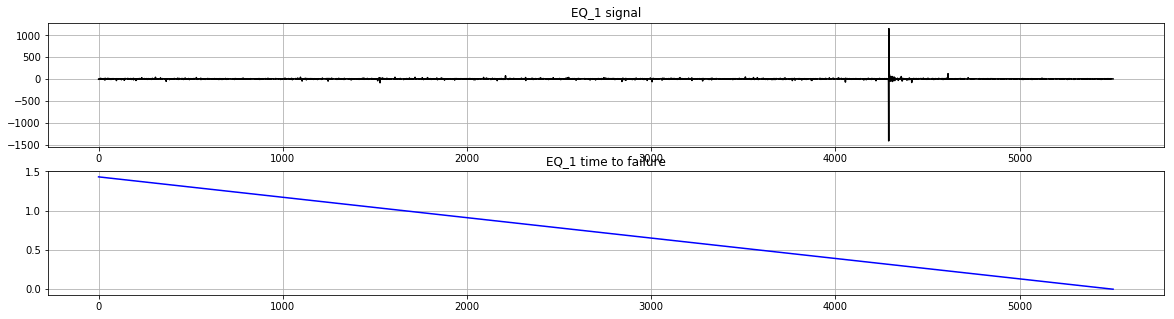

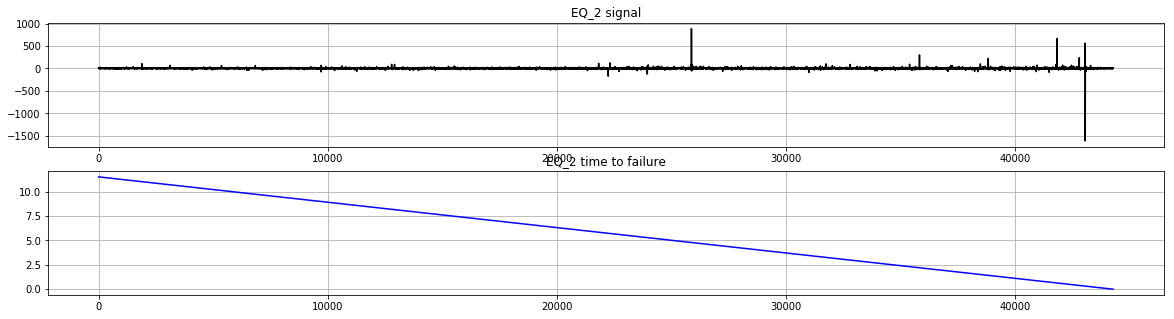

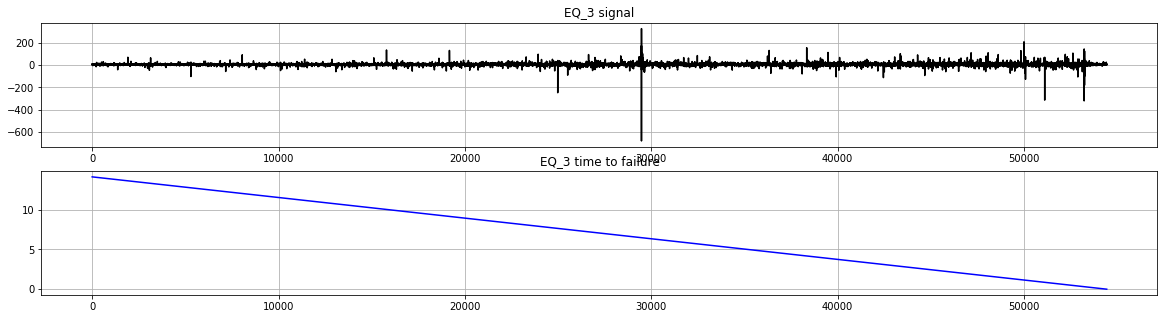

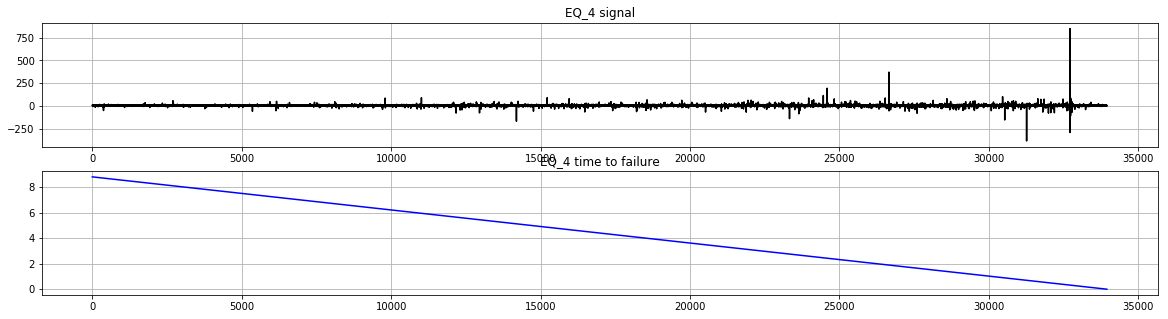

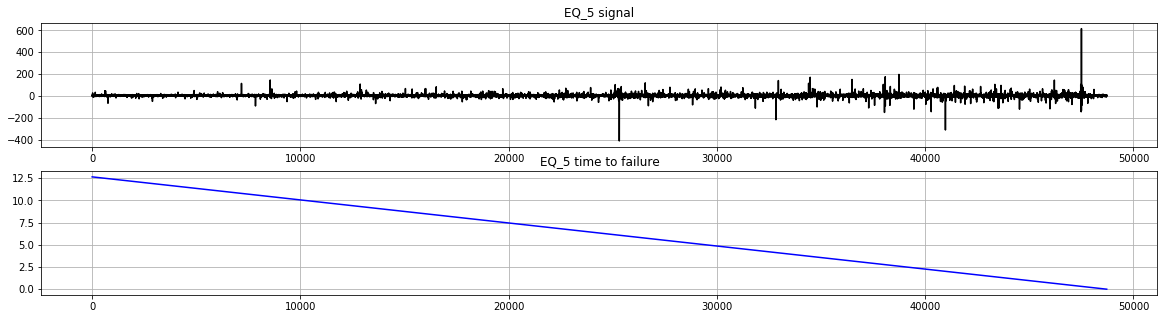

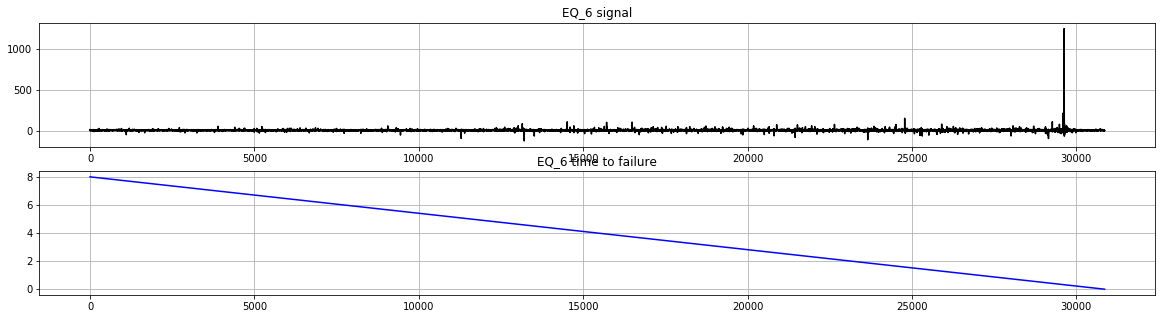

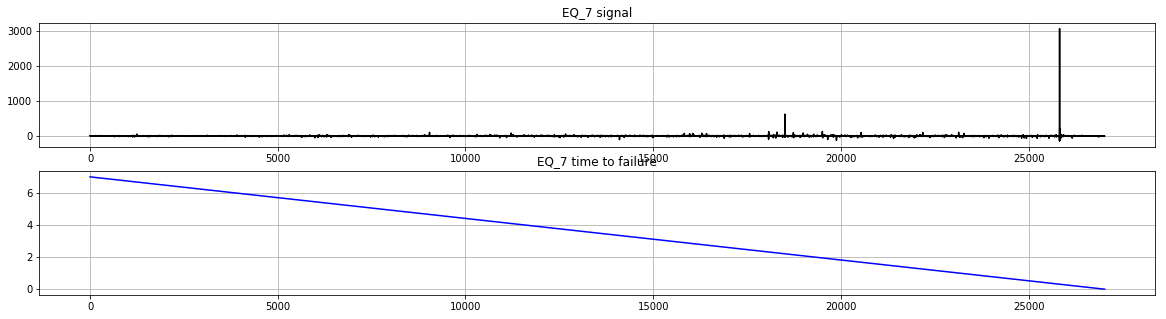

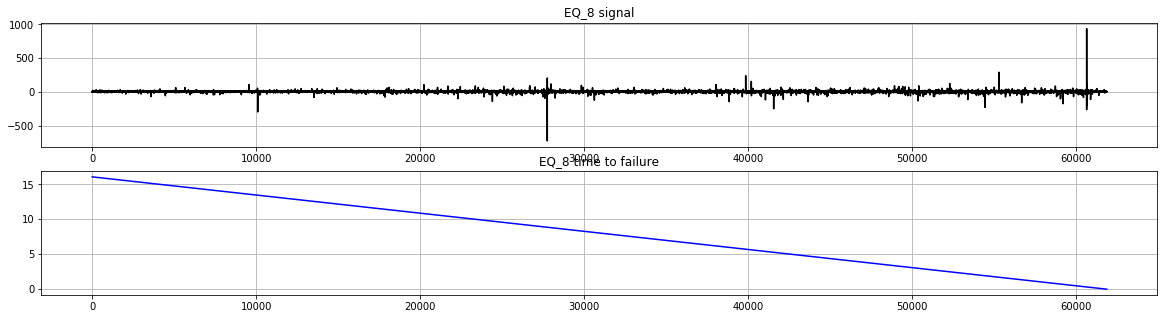

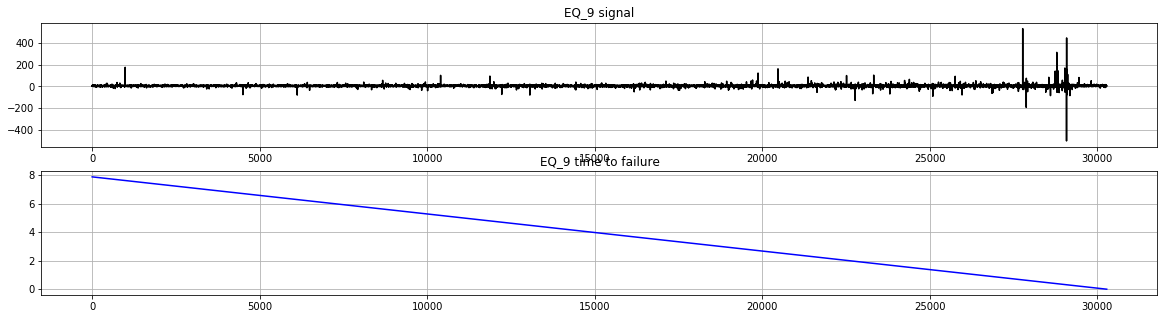

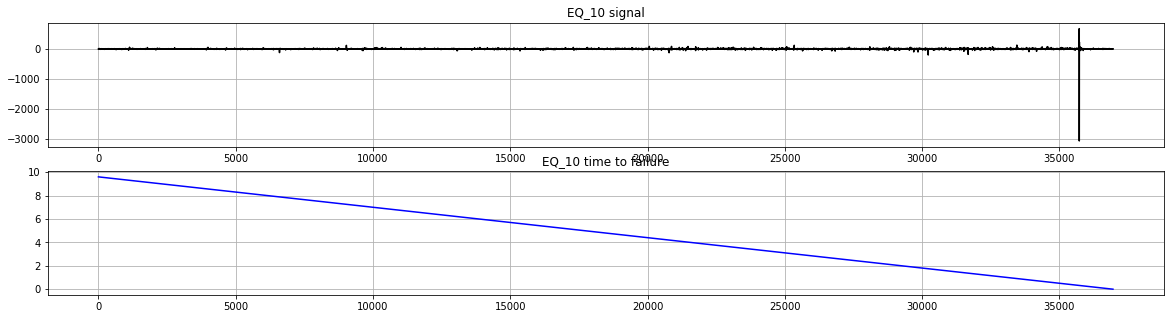

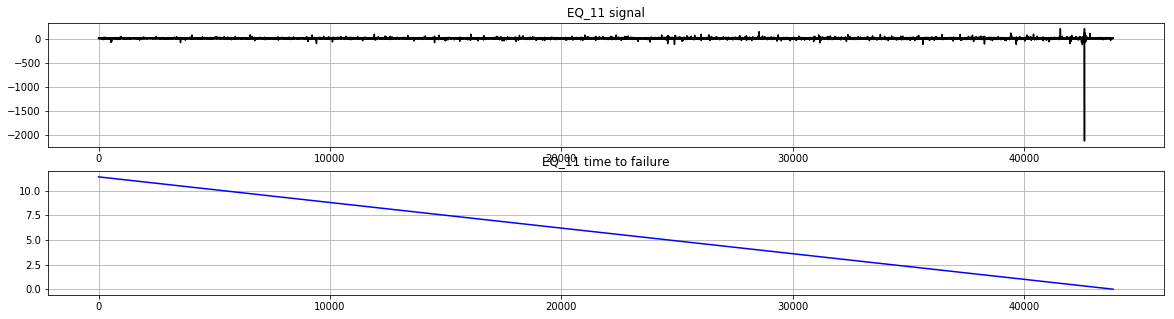

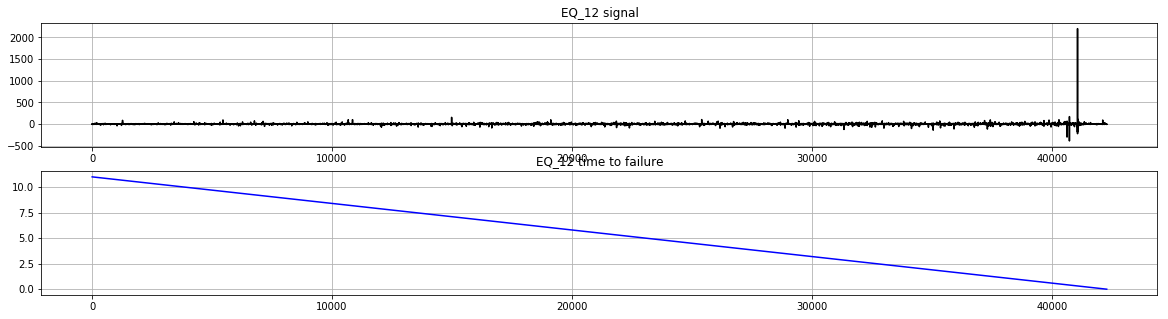

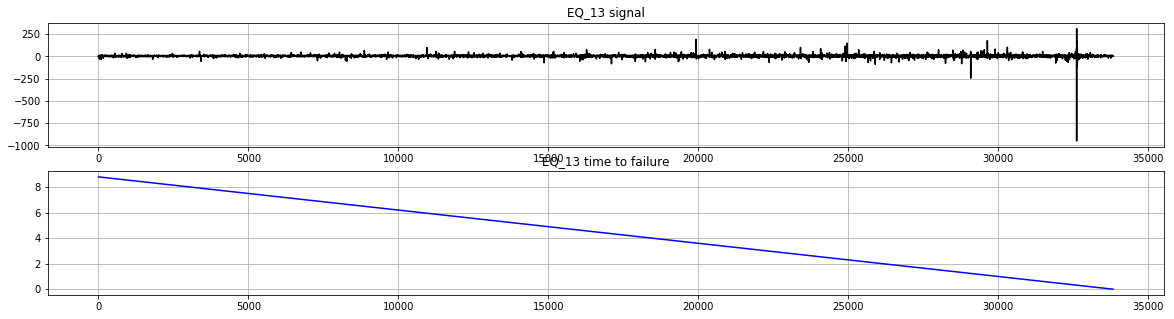

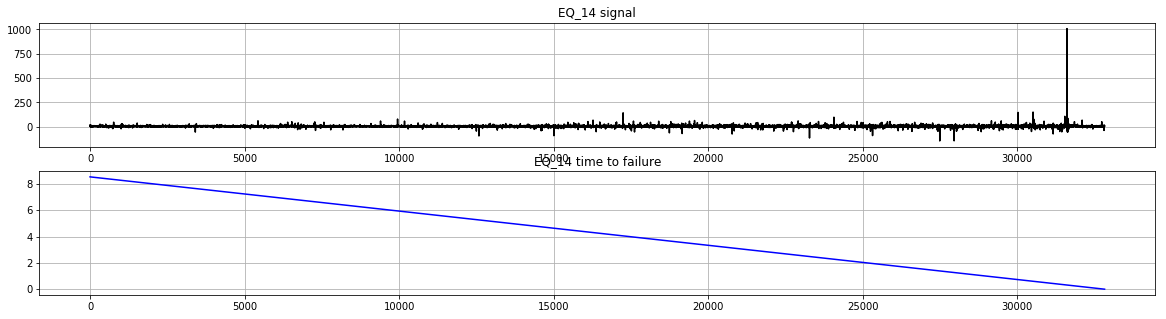

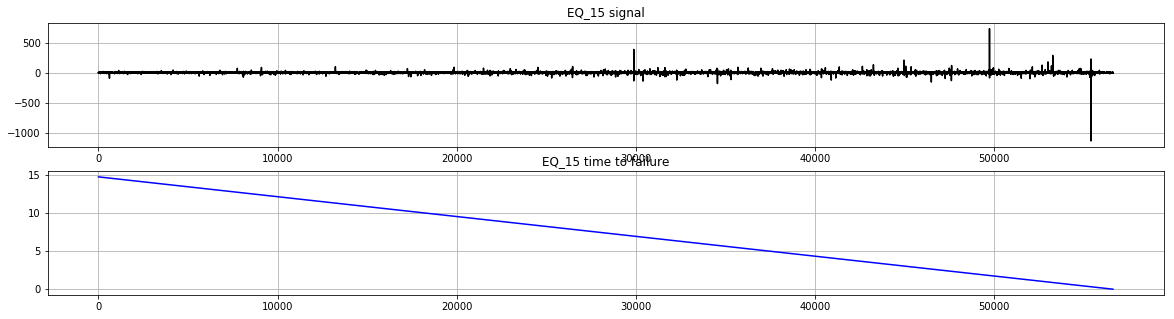

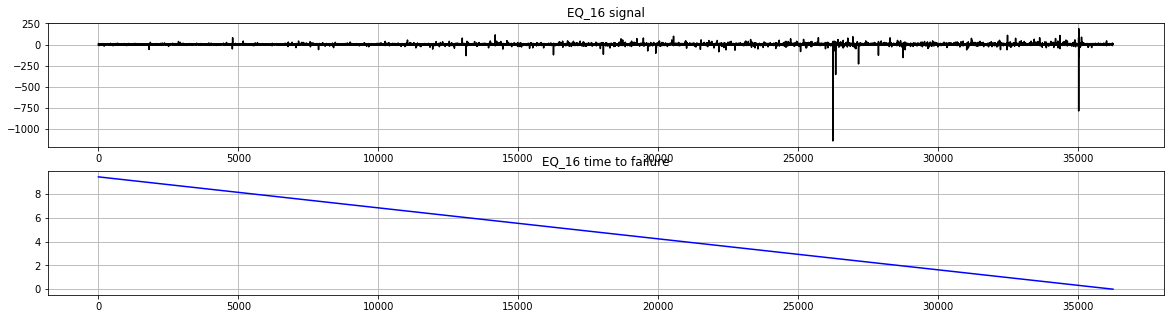

In [10]:
for k in range(len(df_list)):
    temp_s = Feature(df_list[k].s, '../../data/').w_last_elem(window_size=150000, window_stride=1000).data
    temp_t = Feature(df_list[k].ttf, '../../data/').w_last_elem(window_size=150000, window_stride=1000).data
    plt.figure(figsize=(20, 5))
    plt.subplot(2, 1, 1)
    plt.plot(temp_s, 'k')
    plt.title(f"EQ_{k + 1} signal")
    plt.grid(True)
    print()
    plt.subplot(2, 1, 2)
    plt.plot(temp_t, 'b')
    plt.title(f"EQ_{k + 1} time to failure")
    plt.grid(True)

In [5]:
def combine_EQs(exclude_indices=[]):
    concat_list = [pd.read_hdf(f'../../data/EQs/EQ_{i}.h5', key='table') for i in range(1, 17, 1) if i not in exclude_indices]
    return pd.concat(concat_list, ignore_index=True)

In [12]:
df_clean = combine_EQs([2, 3, 8, 16])

In [13]:
temp = Feature(df_clean.s, '../../data/').w_last_elem(window_size=150000, window_stride=1000).data

w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 424390/424390 [00:17<00:00, 23978.79it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000


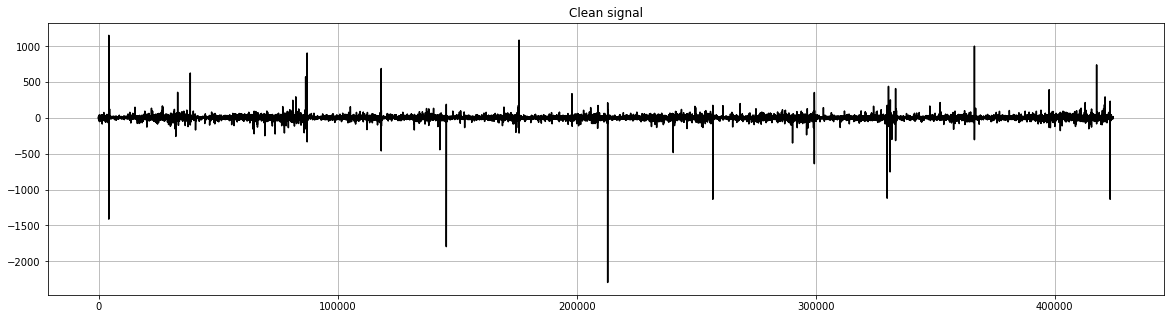

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(temp[temp.columns[0]], 'k')
plt.title(f"Clean signal")
plt.grid(True)

In [16]:
df_clean.to_hdf('../../data/clean_df.h5', key='table')